# Level1 - Student dataset Preprocessing

## Part 1 – Data Cleaning

### Check dataset structure

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("bi.csv", encoding="latin1")

In [3]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [4]:
df.shape

(77, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


### Detect inconsistent categories

In [6]:
df['gender'].unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [7]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [8]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [9]:
df['residence'].unique()

array(['Private', 'Sognsvann', 'BI Residence', 'BI-Residence',
       'BIResidence', 'BI_Residence'], dtype=object)

In [10]:
replace_dict = {
    "gender": {
        "male": "M",
        "Male": "M",
        "female": "F",
        "Female": "F"
    },
    "country": {
        "norway": "Norway",
        "Norge": "Norway",
        "Rsa": "South Africa"
    },
    "prevEducation": {
        "Diplomaaa": "Diploma",
        "diploma": "Diploma",
        "DIPLOMA": "Diploma",
        "High School": "HighSchool",
        "Barrrchelors": "Bachelors"
    },
    "residence": {
        "BI-Residence": "BI Residence",
        "BI_Residence": "BI Residence",
        "BIResidence": "BI Residence"
    }
}


df.replace(replace_dict, inplace=True)


In [11]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [12]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'South Africa', 'Denmark',
       'Netherlands', 'Italy', 'Spain', 'UK', 'Somali', 'Nigeria',
       'Germany', 'France'], dtype=object)

In [13]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'Bachelors', 'Doctorate'],
      dtype=object)

In [14]:
df['residence'].unique()

array(['Private', 'Sognsvann', 'BI Residence'], dtype=object)

In [15]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,M,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,South Africa,Sognsvann,40,HighSchool,120,NaN,44
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,HighSchool,122,91.0,80


## Handle duplicates

In [16]:
df.duplicated().sum()

np.int64(0)

## Part 2 – Missing Data

### Identify missing values

In [17]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

### Impute missing values

In [18]:
df.fillna({"Python": df["Python"].median()}, inplace=True)

In [19]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,M,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,South Africa,Sognsvann,40,HighSchool,120,81.0,44
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,HighSchool,122,91.0,80


## Part 3 – Outliers

### Detect outliers

In [20]:
import seaborn as sns

In [21]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.207792,76.753247,149.714286,75.987013,69.467532
std,10.341966,16.475784,12.743272,15.228517,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,72.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


<Axes: xlabel='studyHOURS'>

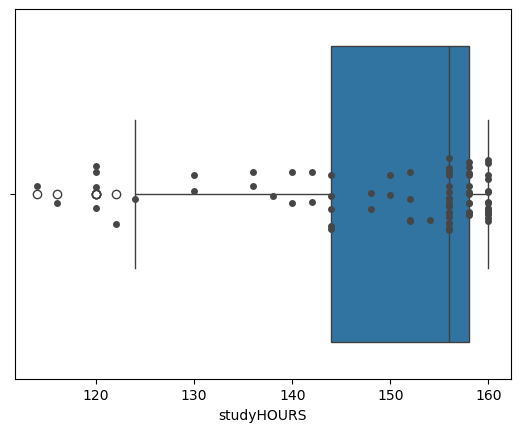

In [22]:
sns.boxplot(x='studyHOURS', data=df)
sns.stripplot(x='studyHOURS', data=df, color="#474646")

<Axes: xlabel='Age'>

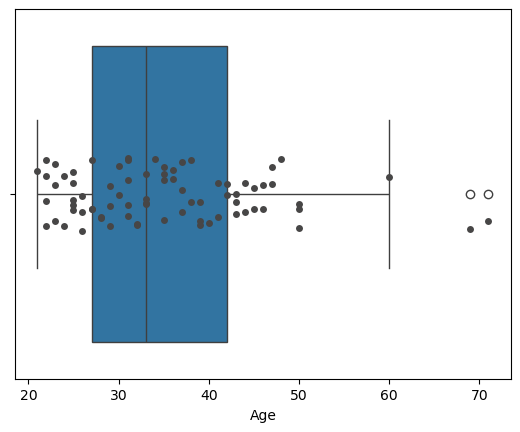

In [23]:
sns.boxplot(x='Age', data=df)
sns.stripplot(x='Age', data=df, color="#474646")

### Handle outliers

In [24]:
from datasist.structdata import detect_outliers

In [25]:
outliers_indices = detect_outliers(df, 0, ['studyHOURS'])
col_median = df['studyHOURS'].median()
df.loc[outliers_indices, 'studyHOURS'] = col_median

In [26]:
df["studyHOURS"].describe()

count     77.000000
mean     153.090909
std        8.134044
min      124.000000
25%      152.000000
50%      156.000000
75%      158.000000
max      160.000000
Name: studyHOURS, dtype: float64

In [27]:
outliers_indices = detect_outliers(df, 0, ['Age'])
col_median = df['Age'].median()
df.loc[outliers_indices, 'Age'] = col_median

In [28]:
df["Age"].describe()

count    77.000000
mean     34.246753
std       8.617845
min      21.000000
25%      27.000000
50%      33.000000
75%      41.000000
max      60.000000
Name: Age, dtype: float64

In [29]:
df.to_csv("cleaned_data.csv", index=False)

# Level2 - Student dataset Preprocessing

##  Part 4 – Feature Engineering

In [30]:
df['Programming_Avg'] = (df['Python'] + df['DB'])/2
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55,57.0
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75,67.5
2,Philip,Leo,25,M,Uganda,Sognsvann,55,HighSchool,130,74.0,50,62.0
3,Shoni,Hlongwane,22,F,South Africa,Sognsvann,40,HighSchool,156,81.0,44,62.5
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,HighSchool,156,91.0,80,85.5


In [31]:
df['isAdult'] = df['Age'] >= 25
df['isAdult'] = df['isAdult'].astype(int)
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55,57.0,1
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75,67.5,1
2,Philip,Leo,25,M,Uganda,Sognsvann,55,HighSchool,130,74.0,50,62.0,1
3,Shoni,Hlongwane,22,F,South Africa,Sognsvann,40,HighSchool,156,81.0,44,62.5,0
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,HighSchool,156,91.0,80,85.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,F,France,Private,80,Bachelors,150,75.0,43,59.0,1
73,Julian,Nielsen,31,M,Denmark,Sognsvann,90,Masters,158,84.0,83,83.5,1
74,Sophie,Brown,33,F,UK,Sognsvann,96,Masters,158,85.0,90,87.5,1
75,Leon,Bauer,35,M,Germany,Sognsvann,90,Masters,160,87.0,74,80.5,1


In [32]:
def categorie_hours(h):
    if h < 152:
        return 'Low'
    elif h <= 158:
        return 'Medium'
    else:
        return 'High'

df['studyHOURS_cat'] = df['studyHOURS'].apply(categorie_hours)
df.head()


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult,studyHOURS_cat
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55,57.0,1,Medium
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75,67.5,1,Low
2,Philip,Leo,25,M,Uganda,Sognsvann,55,HighSchool,130,74.0,50,62.0,1,Low
3,Shoni,Hlongwane,22,F,South Africa,Sognsvann,40,HighSchool,156,81.0,44,62.5,0,Medium
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,HighSchool,156,91.0,80,85.5,0,Medium


In [33]:
df = df.drop(["fNAME", "lNAME"], axis=1)

## Part 5 – Feature Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB,Programming_Avg,isAdult
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,34.246753,76.753247,153.090909,75.987013,69.467532,72.727273,0.870130
std,8.617845,16.475784,8.134044,15.228517,17.033701,13.674685,0.338365
min,21.000000,28.000000,124.000000,15.000000,30.000000,31.500000,0.000000
25%,27.000000,69.000000,152.000000,72.000000,56.000000,65.000000,1.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000,74.500000,1.000000
75%,41.000000,90.000000,158.000000,85.000000,83.000000,84.000000,1.000000
max,60.000000,98.000000,160.000000,91.000000,100.000000,93.000000,1.000000


In [36]:
numeric_cols = ['Age','entryEXAM' , 'Python', 'DB', 'studyHOURS', 'Programming_Avg']
df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])
df

,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult,studyHOURS_cat
0,0.589744,F,Norway,Private,0.628571,Masters,0.944444,0.578947,0.357143,0.414634,1,Medium
1,1.000000,M,Kenya,Private,0.728571,Diploma,0.722222,0.592105,0.642857,0.585366,1,Low
2,0.102564,M,Uganda,Sognsvann,0.385714,HighSchool,0.166667,0.776316,0.285714,0.495935,1,Low
3,0.025641,F,South Africa,Sognsvann,0.171429,HighSchool,0.888889,0.868421,0.200000,0.504065,0,Medium
4,0.051282,F,South Africa,Sognsvann,0.528571,HighSchool,0.888889,1.000000,0.714286,0.878049,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.564103,F,France,Private,0.742857,Bachelors,0.722222,0.789474,0.185714,0.447154,1,Low
73,0.256410,M,Denmark,Sognsvann,0.885714,Masters,0.944444,0.907895,0.757143,0.845528,1,Medium
74,0.307692,F,UK,Sognsvann,0.971429,Masters,0.944444,0.921053,0.857143,0.910569,1,Medium
75,0.358974,M,Germany,Sognsvann,0.885714,Masters,1.000000,0.947368,0.628571,0.796748,1,High


##  Part 6 – Encoding Categorical Data

In [38]:
from category_encoders import BinaryEncoder

In [39]:
encoder = BinaryEncoder()

In [41]:
Transformed_Df = encoder.fit_transform(df[['gender', 'residence', 'country']])
Transformed_Df

,gender_0,gender_1,residence_0,residence_1,country_0,country_1,country_2,country_3
0,0,1,0,1,0,0,0,1
1,1,0,0,1,0,0,1,0
2,1,0,1,0,0,0,1,1
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
72,0,1,0,1,1,1,0,1
73,1,0,1,0,0,1,0,1
74,0,1,1,0,1,0,0,1
75,1,0,1,0,1,1,0,0


In [42]:
df = pd.concat([df,Transformed_Df] , axis = 1 )
df

,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult,studyHOURS_cat,gender_0,gender_1,residence_0,residence_1,country_0,country_1,country_2,country_3
0,0.589744,F,Norway,Private,0.628571,Masters,0.944444,0.578947,0.357143,0.414634,1,Medium,0,1,0,1,0,0,0,1
1,1.000000,M,Kenya,Private,0.728571,Diploma,0.722222,0.592105,0.642857,0.585366,1,Low,1,0,0,1,0,0,1,0
2,0.102564,M,Uganda,Sognsvann,0.385714,HighSchool,0.166667,0.776316,0.285714,0.495935,1,Low,1,0,1,0,0,0,1,1
3,0.025641,F,South Africa,Sognsvann,0.171429,HighSchool,0.888889,0.868421,0.200000,0.504065,0,Medium,0,1,1,0,0,1,0,0
4,0.051282,F,South Africa,Sognsvann,0.528571,HighSchool,0.888889,1.000000,0.714286,0.878049,0,Medium,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.564103,F,France,Private,0.742857,Bachelors,0.722222,0.789474,0.185714,0.447154,1,Low,0,1,0,1,1,1,0,1
73,0.256410,M,Denmark,Sognsvann,0.885714,Masters,0.944444,0.907895,0.757143,0.845528,1,Medium,1,0,1,0,0,1,0,1
74,0.307692,F,UK,Sognsvann,0.971429,Masters,0.944444,0.921053,0.857143,0.910569,1,Medium,0,1,1,0,1,0,0,1
75,0.358974,M,Germany,Sognsvann,0.885714,Masters,1.000000,0.947368,0.628571,0.796748,1,High,1,0,1,0,1,1,0,0


In [43]:
prevEducation_dict = {'HighSchool':1,
        'Diploma':2,
        'Bachelors':3,
        'Masters':4,
        'Doctorate':5}

df['prevEducation'] = df['prevEducation'].map(prevEducation_dict)
df

,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult,studyHOURS_cat,gender_0,gender_1,residence_0,residence_1,country_0,country_1,country_2,country_3
0,0.589744,F,Norway,Private,0.628571,4,0.944444,0.578947,0.357143,0.414634,1,Medium,0,1,0,1,0,0,0,1
1,1.000000,M,Kenya,Private,0.728571,2,0.722222,0.592105,0.642857,0.585366,1,Low,1,0,0,1,0,0,1,0
2,0.102564,M,Uganda,Sognsvann,0.385714,1,0.166667,0.776316,0.285714,0.495935,1,Low,1,0,1,0,0,0,1,1
3,0.025641,F,South Africa,Sognsvann,0.171429,1,0.888889,0.868421,0.200000,0.504065,0,Medium,0,1,1,0,0,1,0,0
4,0.051282,F,South Africa,Sognsvann,0.528571,1,0.888889,1.000000,0.714286,0.878049,0,Medium,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.564103,F,France,Private,0.742857,3,0.722222,0.789474,0.185714,0.447154,1,Low,0,1,0,1,1,1,0,1
73,0.256410,M,Denmark,Sognsvann,0.885714,4,0.944444,0.907895,0.757143,0.845528,1,Medium,1,0,1,0,0,1,0,1
74,0.307692,F,UK,Sognsvann,0.971429,4,0.944444,0.921053,0.857143,0.910569,1,Medium,0,1,1,0,1,0,0,1
75,0.358974,M,Germany,Sognsvann,0.885714,4,1.000000,0.947368,0.628571,0.796748,1,High,1,0,1,0,1,1,0,0


In [45]:
df = df.drop(['country', 'residence', 'gender'], axis=1)
df

,Age,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult,studyHOURS_cat,gender_0,gender_1,residence_0,residence_1,country_0,country_1,country_2,country_3
0,0.589744,0.628571,4,0.944444,0.578947,0.357143,0.414634,1,Medium,0,1,0,1,0,0,0,1
1,1.000000,0.728571,2,0.722222,0.592105,0.642857,0.585366,1,Low,1,0,0,1,0,0,1,0
2,0.102564,0.385714,1,0.166667,0.776316,0.285714,0.495935,1,Low,1,0,1,0,0,0,1,1
3,0.025641,0.171429,1,0.888889,0.868421,0.200000,0.504065,0,Medium,0,1,1,0,0,1,0,0
4,0.051282,0.528571,1,0.888889,1.000000,0.714286,0.878049,0,Medium,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.564103,0.742857,3,0.722222,0.789474,0.185714,0.447154,1,Low,0,1,0,1,1,1,0,1
73,0.256410,0.885714,4,0.944444,0.907895,0.757143,0.845528,1,Medium,1,0,1,0,0,1,0,1
74,0.307692,0.971429,4,0.944444,0.921053,0.857143,0.910569,1,Medium,0,1,1,0,1,0,0,1
75,0.358974,0.885714,4,1.000000,0.947368,0.628571,0.796748,1,High,1,0,1,0,1,1,0,0
